In [40]:
import pandas as pd
import numpy as np
import glob
import datetime
import matplotlib.pyplot as plt
#import geopandas as gp

In [2]:
foreign_aid = pd.read_csv("../data/us_foreign_aid_complete.csv")

C:\Users\Erin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,43,44,45,48,49,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
foreign_aid.head()

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Activity Start Date,Activity End Date,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,year,Operating Unit
0,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,2,Obligations,2011,NaN,9941000000,11391531078,2011.0,NaN
1,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,2,Obligations,2012,NaN,9243000000,10394677800,2012.0,NaN
2,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,3,Disbursements,2011,NaN,7840175215,8984166544,2011.0,NaN
3,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,3,Disbursements,2013,NaN,7764310985,8573982850,2013.0,NaN
4,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,2,Obligations,2013,NaN,6928000000,7650460330,2013.0,NaN


In [4]:
foreign_aid.shape

(2950513, 54)

In [5]:
print(foreign_aid.columns.tolist())

['Country ID', 'Country Code', 'Country Name', 'Region ID', 'Region Name', 'Income Group ID', 'Income Group Name', 'Income Group Acronym', 'Managing Agency ID', 'Managing Agency Acronym', 'Managing Agency Name', 'Managing Sub-agency or Bureau ID', 'Managing Sub-agency or Bureau Acronym', 'Managing Sub-agency or Bureau Name', 'Implementing Partner Category ID', 'Implementing Partner Category Name', 'Implementing Partner Sub-category ID', 'Implementing Partner Sub-category Name', 'Implementing Partner ID', 'Implementing Partner Name', 'International Category ID', 'International Category Name', 'International Sector Code', 'International Sector Name', 'International Purpose Code', 'International Purpose Name', 'US Category ID', 'US Category Name', 'US Sector ID', 'US Sector Name', 'Funding Acount ID', 'Funding Account Name', 'Funding Agency ID', 'Funding Agency Name', 'Funding Agency Acronym', 'Foreign Assistance Objective ID', 'Foreign Assistance Objective Name', 'Aid Type Group ID', 'Ai

In [6]:
foreign_aid = foreign_aid.rename(columns={
#'Country ID',
'Country Code': 'country_code',
#'Country Name',
#'Region ID',
#'Region Name',
#'Income Group ID',
#'Income Group Name',
#'Income Group Acronym',
#'Managing Agency ID',
'Managing Agency Acronym': 'managing_agency_acr',
'Managing Agency Name': 'managing_agency',
#'Managing Sub-agency or Bureau ID',
'Managing Sub-agency or Bureau Acronym': 'managing_subagency_acr',
'Managing Sub-agency or Bureau Name': 'managing_subagency',
#'Implementing Partner Category ID',
'Implementing Partner Category Name': 'imp_partner_cat',
#'Implementing Partner Sub-category ID',
'Implementing Partner Sub-category Name': 'imp_partner_subcat',
#'Implementing Partner ID',
'Implementing Partner Name': 'imp_partner',
#'International Category ID',
'International Category Name': 'int_category',
#'International Sector Code',
'International Sector Name': 'int_sector',
#'International Purpose Code',
'International Purpose Name': 'int_purpose',
#'US Category ID',
'US Category Name': 'us_category',
#'US Sector ID',
'US Sector Name': 'us_sector',
#'Funding Acount ID',
'Funding Account Name': 'funding_account',
#'Funding Agency ID',
'Funding Agency Name': 'funding_agency',
'Funding Agency Acronym': 'funding_agency_acr',
#'Foreign Assistance Objective ID',
'Foreign Assistance Objective Name': 'objective',
#'Aid Type Group ID',
'Aid Type Group Name': 'aid_type',
#'Activity ID',
#'Submission ID',
'Activity Name': 'activity',
'Activity Description':'description',
'Activity Project Number':'project_num',
'Activity Start Date':'start_date',
'Activity End Date':'end_date',
#'Transaction Type ID',
'Transaction Type Name':'trans_type',
'Fiscal Year':'fiscal_yr',
'Transaction Date':'trans_date',
'Current Dollar Amount':'current_dollar_amount',
'Constant Dollar Amount':'constant_dollar_amount',
'year':'year',
'Operating Unit':'operating_unit'})

In [7]:
print(foreign_aid.columns.tolist())

['Country ID', 'country_code', 'Country Name', 'Region ID', 'Region Name', 'Income Group ID', 'Income Group Name', 'Income Group Acronym', 'Managing Agency ID', 'managing_agency_acr', 'managing_agency', 'Managing Sub-agency or Bureau ID', 'managing_subagency_acr', 'managing_subagency', 'Implementing Partner Category ID', 'imp_partner_cat', 'Implementing Partner Sub-category ID', 'imp_partner_subcat', 'Implementing Partner ID', 'imp_partner', 'International Category ID', 'int_category', 'International Sector Code', 'int_sector', 'International Purpose Code', 'int_purpose', 'US Category ID', 'us_category', 'US Sector ID', 'us_sector', 'Funding Acount ID', 'funding_account', 'Funding Agency ID', 'funding_agency', 'funding_agency_acr', 'Foreign Assistance Objective ID', 'objective', 'Aid Type Group ID', 'aid_type', 'Activity ID', 'Submission ID', 'activity', 'description', 'project_num', 'start_date', 'end_date', 'Transaction Type ID', 'trans_type', 'fiscal_yr', 'trans_date', 'current_doll

In [8]:
mexico = foreign_aid.loc[foreign_aid["country_code"].isin(['MEX'])]
mexico

,Country ID,country_code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,managing_agency_acr,...,start_date,end_date,Transaction Type ID,trans_type,fiscal_yr,trans_date,current_dollar_amount,constant_dollar_amount,year,operating_unit
458,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,...,NaN,NaN,2,Obligations,2010,NaN,535151684,625474521,2010.0,NaN
526,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,...,NaN,NaN,2,Obligations,2015,NaN,455185015,487524827,2015.0,NaN
768,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,...,NaN,NaN,2,Obligations,2014,NaN,301159001,326284598,2014.0,NaN
831,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,...,NaN,NaN,3,Disbursements,2011,NaN,295191410,338263970,2011.0,NaN
967,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,...,NaN,NaN,2,Obligations,2011,NaN,253166913,290107510,2011.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950484,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,98,NaN,...,NaN,NaN,18,President's Budget Requests,2015,NaN,3225,3454,2015.0,NaN
2950485,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,98,NaN,...,NaN,NaN,1,Appropriated and Planned,2016,NaN,3063,3252,2016.0,NaN
2950486,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,98,NaN,...,NaN,NaN,1,Appropriated and Planned,2017,NaN,3057,3189,2017.0,NaN
2950487,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,98,NaN,...,NaN,NaN,1,Appropriated and Planned,2006,NaN,3000,3751,2006.0,Mexico


In [9]:
mexico = mexico[[
'country_code',
#'managing_agency_acr',
'managing_agency',
#'managing_subagency_acr',
'managing_subagency',
'imp_partner_cat',
'imp_partner_subcat',
'imp_partner',
'int_category',
'int_sector',
'int_purpose',
'us_category',
'us_sector',
'funding_account',
'funding_agency',
#'funding_agency_acr',
'objective',
'aid_type',
'activity',
'description',
'project_num',
'start_date',
'end_date',
'trans_type',
'fiscal_yr',
'trans_date',
'current_dollar_amount',
'constant_dollar_amount',
'year',
'operating_unit']]
mexico.head()

,country_code,managing_agency,managing_subagency,imp_partner_cat,imp_partner_subcat,imp_partner,int_category,int_sector,int_purpose,us_category,...,project_num,start_date,end_date,trans_type,fiscal_yr,trans_date,current_dollar_amount,constant_dollar_amount,year,operating_unit
458,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaN,NaN,Obligations,2010,NaN,535151684,625474521,2010.0,NaN
526,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaN,NaN,Obligations,2015,NaN,455185015,487524827,2015.0,NaN
768,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaN,NaN,Obligations,2014,NaN,301159001,326284598,2014.0,NaN
831,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaN,NaN,Disbursements,2011,NaN,295191410,338263970,2011.0,NaN
967,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaN,NaN,Obligations,2011,NaN,253166913,290107510,2011.0,NaN


In [10]:
mexico = mexico.dropna(axis=1,how='all')

In [11]:
# mexico[['country_code', 'managing_agency', 'managing_subagency','imp_partner_cat', 'imp_partner_subcat', 'imp_partner',
#    'int_category', 'int_sector', 'int_purpose', 'us_category','us_sector','funding_account','funding_agency',
#    'objective','aid_type','activity','description','operating_unit']] = mexico[['country_code', 'managing_agency',
#    'managing_subagency','imp_partner_cat', 'imp_partner_subcat', 'imp_partner', 'int_category', 'int_sector',
#    'int_purpose', 'us_category','us_sector','funding_account','funding_agency','objective','aid_type','activity',
#    'description','operating_unit']].astype(str)

In [12]:
mexico = mexico.replace('1976tq', '1976')
mexico[['fiscal_yr', 'year']]=mexico[['fiscal_yr', 'year']].astype(int)

In [15]:
mexico[['start_date', 'end_date', 'trans_date']]=mexico[['start_date', 'end_date','trans_date']].astype(str)
mexico[['start_date', 'end_date', 'trans_date']]=mexico[['start_date', 'end_date','trans_date']].astype('datetime64[ns]')

In [16]:
mexico.dtypes

country_code                      object
managing_agency                   object
managing_subagency                object
imp_partner_cat                   object
imp_partner_subcat                object
imp_partner                       object
int_category                      object
int_sector                        object
int_purpose                       object
us_category                       object
us_sector                         object
funding_account                   object
funding_agency                    object
objective                         object
aid_type                          object
activity                          object
description                       object
project_num                       object
start_date                datetime64[ns]
end_date                  datetime64[ns]
trans_type                        object
fiscal_yr                          int32
trans_date                datetime64[ns]
current_dollar_amount              int64
constant_dollar_

In [34]:
#cell to explore contents of various cells
explore = mexico['int_purpose'].unique()
explore

array(['Legal and judicial development',
       'Security system management and reform', 'Narcotics control',
       'Multisector aid', 'Material relief assistance and services',
       'Disarmament of Weapons of Mass Destruction (WMD)',
       'Nuclear energy electric power plants and nuclear safety',
       'Labour Rights',
       'Decentralisation and support to subnational government',
       'Employment Creation', 'Business Policy and Administation',
       'Human rights', 'Biosphere protection',
       'Democratic participation and civil society',
       'Public sector policy and administrative management',
       'Countering violent extremism',
       'Anti-corruption organisations and institutions',
       'Multisector education/training',
       'Relief co-ordination; protection and support services',
       'Infectious disease control', 'Operating Expenses',
       'Bio-diversity', 'Higher education', 'Food Assistance',
       'STD control including HIV/AIDS',
       'Energy 

In [28]:
narcotics_account = mexico.loc[mexico["funding_account"].isin(['International Narcotics Control and Law Enforcement'])]
narcotics_account.head()

,country_code,managing_agency,managing_subagency,imp_partner_cat,imp_partner_subcat,imp_partner,int_category,int_sector,int_purpose,us_category,...,project_num,start_date,end_date,trans_type,fiscal_yr,trans_date,current_dollar_amount,constant_dollar_amount,year,operating_unit
458,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaT,NaT,Obligations,2010,NaT,535151684,625474521,2010,nan
526,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaT,NaT,Obligations,2015,NaT,455185015,487524827,2015,nan
768,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaT,NaT,Obligations,2014,NaT,301159001,326284598,2014,nan
831,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaT,NaT,Disbursements,2011,NaT,295191410,338263970,2011,nan
967,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaT,NaT,Obligations,2011,NaT,253166913,290107510,2011,nan


In [29]:
narcotics_account.shape

(322, 27)

In [32]:
narcotics_agency = mexico.loc[mexico["managing_subagency"].isin(['International Narcotics and Law Enforcement Affairs'])]
narcotics_account.shape

(322, 27)

In [38]:
narcotics_acc = narcotics_account.groupby([narcotics_account['year']]).agg({'constant_dollar_amount': sum})
narcotics_acc

,constant_dollar_amount
year,
1977,49944471
1978,58843350
1979,32070835
1980,18539238
1981,22926151
1982,19348379
1983,17314288
1984,17746960
1985,20018582


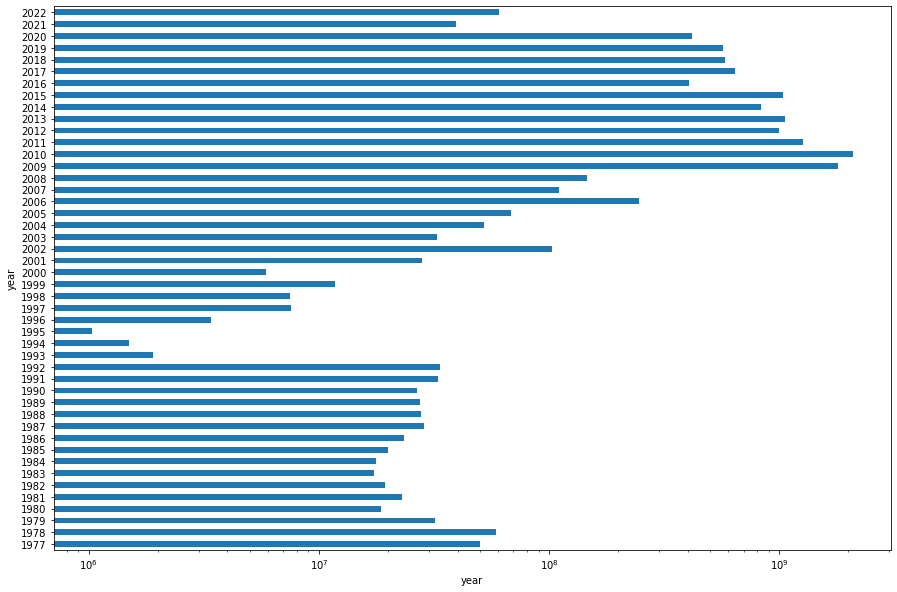

In [42]:
narcotics_acc.plot.barh(figsize=(15, 10), legend=False)
plt.xlabel('year')
plt.xscale('log')
plt.show()